# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [1]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\drito\Documents\SP\scientific_programming\Week_07\challenge


## Functions to get the content of RSS-Feeds

In [2]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """ #geting help
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    rows = []

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description_element = item.find('description', first=True)
            
            # Check if 'description' element exists before accessing 'text'
            description = description_element.text if description_element is not None else ""
            
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            rows.append(row)

    df = pd.DataFrame(rows)
    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [3]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,Multikulti als neue Normalität: warum so viele...,"Wed, 10 Apr 2024 09:30:00 GMT",ld.1824762,Neben dem britischen Premierminister haben der...
1,Terror durch tödliche Gleitbomben – und bald e...,"Wed, 10 Apr 2024 02:44:34 GMT",ld.1825518,Seit Ende März nehmen die Angriffe auf das wir...
2,Putins Propaganda schürt Trumps Isolationismus,"Wed, 10 Apr 2024 03:30:00 GMT",ld.1825594,Viele Amerikaner sind des Kriegs in der Ukrain...
3,Elon Musk legt sich mit Brasiliens Justiz an –...,"Wed, 10 Apr 2024 03:30:00 GMT",ld.1825595,Der reichste Mann der Welt wirft Brasiliens ob...
4,Ein Habsburger als Kaiser von Mexiko: Vor 160 ...,"Wed, 10 Apr 2024 03:30:00 GMT",ld.1824379,Eine französische Intervention unter Napoleon ...
5,Vor sieben Jahren hat Aziz Ullah seine Heimat ...,"Wed, 10 Apr 2024 03:30:00 GMT",ld.1820889,Seit das Militär die Rohingya aus Myanmar vert...
6,"Australien, Grossbritannien und die USA wollen...","Wed, 10 Apr 2024 03:29:00 GMT",ld.1825548,Die Sicherheitspartnerschaft Aukus beschreitet...
7,Vorschriften aus dem 19. Jahrhundert: US-Glied...,"Tue, 09 Apr 2024 22:00:58 GMT",ld.1825668,"Die Reaktionen auf dieses Urteil zeigen, wie h..."
8,Grosse ethische Bedenken: Israel setzt in Gaza...,"Tue, 09 Apr 2024 14:45:00 GMT",ld.1825369,"Noch immer entscheiden Soldaten, wer als Angri..."
9,War es ein Attentat? Der Mord an einem christl...,"Tue, 09 Apr 2024 14:50:37 GMT",ld.1825566,Der konfessionell gemischte Staat steht bereit...


## Getting infos from multiple RSS-Feeds

In [4]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(10)

,title,pubDate,guid,description
0,Islamisten in Deutschland: Wie Extremisten Soc...,"Wed, 10 Apr 2024 16:01:00 +0200",https://www.spiegel.de/panorama/islamisten-in-...,Seit dem Hamas-Angriff auf Israel am 7. Oktobe...
1,Massachusetts: Alleinerziehende Mutter will ab...,"Wed, 10 Apr 2024 15:54:00 +0200",https://www.spiegel.de/netzwelt/web/massachuse...,Mithilfe sozialer Medien und Tausender Hobbyde...
2,Sapoljarny in Russland: In diesem Dorf werden ...,"Wed, 10 Apr 2024 15:46:00 +0200",https://www.spiegel.de/panorama/sapoljarny-in-...,"Gespenstische Leere, kaum Menschen und eiskalt..."
3,Österreichs Kanzler sieht Verhandlungen mit Ru...,"Wed, 10 Apr 2024 15:43:00 +0200",https://www.spiegel.de/ausland/oesterreichs-ka...,"Um den Krieg in der Ukraine zu beenden, müsse ..."
4,Einstige Aphrodisiaka: Die Vorfahren von Viagra,"Wed, 10 Apr 2024 15:41:00 +0200",https://www.spiegel.de/geschichte/einstige-aph...,Von jeher hofften Menschen auf spezielle Mitte...
5,Mittelmeer-Borstenwurm sieht UV-Licht überrasc...,"Wed, 10 Apr 2024 15:28:00 +0200",https://www.spiegel.de/wissenschaft/natur/mitt...,Die Augen des Mittelmeer-Borstenwurms wiegen e...
6,Nienburg: Tödlicher Polizeieinsatz – Aufnahmen...,"Wed, 10 Apr 2024 15:17:00 +0200",https://www.spiegel.de/panorama/justiz/nienbur...,Im niedersächsischen Nienburg erschoss die Pol...
7,Inflationsrate in den USA steigt stärker als e...,"Wed, 10 Apr 2024 15:16:00 +0200",https://www.spiegel.de/wirtschaft/inflationsra...,In den USA sind die Verbraucherpreise im März ...
8,Amanda Knox will Freispruch von Verleumdungsvo...,"Wed, 10 Apr 2024 15:11:00 +0200",https://www.spiegel.de/panorama/amanda-knox-wi...,Lange wurde die US-Amerikanerin Amanda Knox ve...
9,Signa Prime: Sanierungsplan für Benko-Firmen v...,"Wed, 10 Apr 2024 15:05:00 +0200",https://www.spiegel.de/wirtschaft/unternehmen/...,Die Aktionäre haben dem Sanierungsplan für zwe...


## Finding the k most frequent words per RSS-Feed title

In [5]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('Islamisten', 1), ('in', 1), ('Deutschland:', 1), ('Wie', 1), ('Extremisten', 1)]
[('Massachusetts:', 1), ('Alleinerziehende', 1), ('Mutter', 1), ('will', 1), ('abgetauchten', 1)]
[('Sapoljarny', 1), ('in', 1), ('Russland:', 1), ('In', 1), ('diesem', 1)]
[('Österreichs', 1), ('Kanzler', 1), ('sieht', 1), ('Verhandlungen', 1), ('mit', 1)]
[('Einstige', 1), ('Aphrodisiaka:', 1), ('Die', 1), ('Vorfahren', 1), ('von', 1)]
[('Mittelmeer-Borstenwurm', 1), ('sieht', 1), ('UV-Licht', 1), ('überraschend', 1), ('scharf', 1)]
[('Nienburg:', 1), ('Tödlicher', 1), ('Polizeieinsatz', 1), ('–', 1), ('Aufnahmen', 1)]
[('Inflationsrate', 1), ('in', 1), ('den', 1), ('USA', 1), ('steigt', 1)]
[('Amanda', 1), ('Knox', 1), ('will', 1), ('Freispruch', 1), ('von', 1)]
[('Signa', 1), ('Prime:', 1), ('Sanierungsplan', 1), ('für', 1), ('Benko-Firmen', 1)]
[('Solingen:', 1), ('Brandstiftung', 1), ('und', 1), ('Machetenangriff', 1), ('aus', 1)]
[('Gerd', 1), ('Gigerenzer', 1), ('über', 1), ('Künstliche', 1), ('

## Create a wordcloud with the most frequent words in RSS-Feed titles

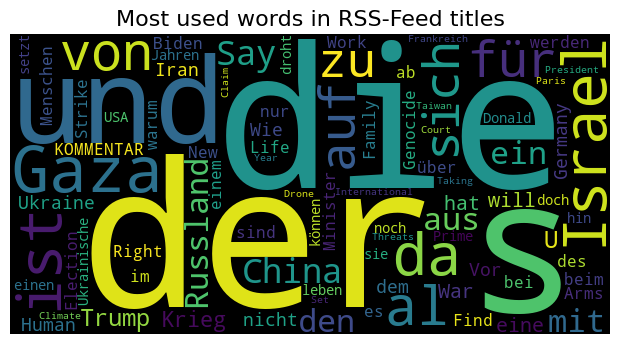

In [8]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-04-10 16:04:38
Python Version: 3.11.7
-----------------------------------
